# Exercise session 1: Overview of the Xpress Python Interface

## Creating a simple LP

First, create the simple mixed integer linear program:

$$
\begin{array}{lll}
  \min & x + y\\
  \textrm{s.t.} & 2x + 3y \ge 6\\
                & 4x + 2y \ge 7\\
                & x,y \ge 0
\end{array}
$$

In [1]:
# Location of manual and examples can be found by calling appropriate functions:

import xpress
print(xpress.manual())
print(xpress.examples())

/usr/local/lib/python3.7/site-packages/xpress/doc/python-interface.pdf
/usr/local/lib/python3.7/site-packages/xpress/examples/


In [2]:
import xpress as xp

# TODO Declare variables: x = xp.var(...)
x = xp.var()
y = xp.var()
# TODO Define constraints: constr1 = 2*x + ...
constr1 = 2*x+3*y >= 6
constr2 = 4*x+2*y >= 8

# TODO Define objective: obj = ...
obj = x+y

# TODO Create problem: p = xp.problem(...)
p = xp.problem([x,y], constr1, constr2, obj)

p.solve()

print(f'solution: x={p.getSolution(x)}, y={p.getSolution(y)}')

FICO Xpress v8.9.0, Hyper, solve started 19:31:54, Sep 15, 2020
Heap usage: 331KB (peak 331KB, 568KB system)
Detected container-enforced core limit of 1
Detected container-enforced memory limit of 2048 MB
Minimizing LP noname
Original problem has:
         2 rows            2 cols            4 elements
Presolved problem has:
         2 rows            2 cols            4 elements
Presolve finished in 0 seconds
Heap usage: 331KB (peak 343KB, 570KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 2.00e+00,  4.00e+00] / [ 5.00e-01,  1.50e+00]
  RHS and bounds [min,max] : [ 6.00e+00,  8.00e+00] / [ 2.00e+00,  3.00e+00]
  Objective      [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
Autoscaling applied standard scaling

 
   Its         Obj Value      S   Ninf  Nneg   Sum Dual Inf  Time
     0           .000000      D      2     0        .000000     0
     2          2.500000      D      0     0        .000000 

Add the constraint $x + 2y \le 2$ to the problem, then re-solve. The problem should now be infeasible.

In [3]:
# TODO Create constraint
constr3 = x+2*y <= 2

# TODO Add constraint to problem
p.addConstraint(constr3)

# TODO Call solve() again
p.solve()

FICO Xpress v8.9.0, Hyper, solve started 19:31:55, Sep 15, 2020
Heap usage: 2598KB (peak 2599KB, 570KB system)
Detected container-enforced core limit of 1
Detected container-enforced memory limit of 2048 MB
Minimizing LP noname
Original problem has:
         3 rows            2 cols            6 elements
 
 
The problem is infeasible due to row R3
Presolve finished in 0 seconds
Heap usage: 2598KB (peak 2599KB, 570KB system)


Use the `iisall` function to understand what made the problem infeasible. If needed, type `help(p.iisall)` for its docstring.

In [4]:
# TODO Call iisall() on problem p (easy...).
p.iisall()

Size of IIS approximation is 2 rows and 2 columns
   Name      Type    Sense    Bound 
 R1          row     GE      6.000000
 R3          row     LE      2.000000
 C2          column  LO       .000000
Found IIS 1 (2 rows and 1 bounds)
 
No more IIS can be found


Now delete the constraint (using the `problem.delConstraint` method) and, just to avoid the same solve as before, change the objective function coefficient of x to 4. Then re-solve and print primal and dual solution using `problem.getSolution` for the primal solution and `problem.getDual` for the dual solution. Recall that these functions can be called without arguments to obtain the whole vector, or with a variable/constraint object to get one or more values.

In [5]:
# TODO Use delConstraint() to delete the last added constraint
p.delConstraint(2)
# TODO Use p.chgobj() to change one objective coefficient.
# Its syntax has a list of variables for which the
# coefficient is changed and a list of corresponding 
# new coefficient, so the call is like p.chgobj([x1, x2, ...], [c1, c2, ...])
p.chgobj([x], [4])
p.solve()
print(f'Solution: x={p.getSolution(x)}, y={p.getSolution(y)}')
print(f'Dual: constr1->{p.getDual(constr1)}, constr2->{p.getDual(constr2)}')

FICO Xpress v8.9.0, Hyper, solve started 19:31:55, Sep 15, 2020
Heap usage: 4949KB (peak 4949KB, 805KB system)
Detected container-enforced core limit of 1
Detected container-enforced memory limit of 2048 MB
Minimizing LP noname
Original problem has:
         2 rows            2 cols            4 elements
Presolved problem has:
         2 rows            2 cols            4 elements
Presolve finished in 0 seconds
Heap usage: 4950KB (peak 4950KB, 805KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 2.00e+00,  4.00e+00] / [ 5.00e-01,  1.50e+00]
  RHS and bounds [min,max] : [ 6.00e+00,  8.00e+00] / [ 2.00e+00,  3.00e+00]
  Objective      [min,max] : [ 1.00e+00,  4.00e+00] / [ 1.00e+00,  4.00e+00]
Autoscaling applied standard scaling

 
   Its         Obj Value      S   Ninf  Nneg   Sum Dual Inf  Time
     0          7.000000      D      0     1       1.000000     0
     1          4.000000      D      0     0        .000

## Knapsack problem

Formulate and solve a knapsack problem with the following value/weight vectors:

$$
\begin{array}{lllrrrrrrr}
v& =& (12,&15,& 9,&11,& 8,& 7,&5)\\
w& =& (13, &18,& 9,& 12,& 8,& 10,& 4)
\end{array}
$$

and with knapsack capacity $C=40$. You will need the `xpress.Sum` operator.

$$
\begin{array}{lll}
\max & \sum_{i=1}^n v_i x_i\\
\textrm{s.t.} & \sum_{i=1}^n w_i x_i \le C\\
& x_i \in \{0,1\} \forall i=1,\ldots{},n
\end{array}
$$ 

In [6]:
import xpress as xp
import numpy as np

v = np.array([12,15,9,11,8, 7,5])
w = np.array([13,18,9,12,8,10,4])
C = 40

# Number of variables
n = len(v)

# TODO Define a list of n binary variables
l = np.array([xp.var(vartype = xp.binary) for i in range(n)], dtype=xp.npvar)

# TODO Define the knapsack constraint and its objective
# TODO Create a problem and add variable list, constraint, and objective
profit = xp.Dot(v, l)
p = xp.problem("knapsack")
p.addVariable(l)
p.addConstraint(xp.Dot(w, l) <= C)
p.setObjective(profit, sense = xp.maximize)

p.solve()

print(p.getSolution())


FICO Xpress v8.9.0, Hyper, solve started 19:31:55, Sep 15, 2020
Heap usage: 331KB (peak 331KB, 554KB system)
Detected container-enforced core limit of 1
Detected container-enforced memory limit of 2048 MB
Maximizing MILP noname
Original problem has:
         1 rows            7 cols            7 elements         7 globals
Presolved problem has:
         1 rows            7 cols            7 elements         7 globals
Presolve finished in 0 seconds
Heap usage: 357KB (peak 361KB, 556KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 4.00e+00,  1.80e+01] / [ 2.50e-01,  1.12e+00]
  RHS and bounds [min,max] : [ 1.00e+00,  4.00e+01] / [ 1.00e+00,  2.50e+00]
  Objective      [min,max] : [ 5.00e+00,  1.50e+01] / [ 5.00e+00,  1.50e+01]
Autoscaling applied standard scaling

Will try to keep branch and bound tree memory usage below 1.3GB
 *** Heuristic solution found:      .000000      Time: 0 ***
 *** Heuristic solution found:

## Reading and solving a MIP

Let's try to solve something bigger, like a file from the MIPLIB 2017 collection. Specifically, `roi2alpha3n4`. It should be available in the directory with this exercise session; load it and solve it as a Python problem.

In [7]:
# TO BE DONE IN CLASS
import xpress as xp

p = xp.problem()
p.read('mipinst.mps.gz')
p.controls.maxtime = -30
p.solve()


Reading Problem roi2alpha3n4
Problem Statistics
        1251 (      1 spare) rows
        6816 (      0 spare) structural columns
      878812 (    174 spare) non-zero elements
Global Statistics
        6642 entities        0 sets        0 set members
FICO Xpress v8.9.0, Hyper, solve started 19:31:58, Sep 15, 2020
Heap usage: 12MB (peak 12MB, 829KB system)
Detected container-enforced core limit of 1
Detected container-enforced memory limit of 2048 MB
Minimizing MILP roi2alpha3n4
Original problem has:
      1251 rows         6816 cols       878812 elements      6642 globals
Presolved problem has:
       443 rows         5364 cols       857240 elements      5190 globals
LP relaxation tightened
Presolve finished in 3 seconds
Heap usage: 34MB (peak 50MB, 830KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e-06,  4.00e+00] / [ 1.00e-06,  1.00e+00]
  RHS and bounds [min,max] : [ 5.70e-01,  4.00e+00] / [ 5.70e-01,  4.

Add a new constraint: the norm of the variable vector is at most 10. Even if the problem was read from a file, you can get the vector of all variables with `problem.getVariable`.

Note that before the constraint is added we'll have to postsolve the problem (using the `problem.postsolve()` function) as, for reasons of performance, the problem remains in a presolved state after the `solve()` call.

In [8]:
import numpy as np
p.postsolve()

# TODO: Get all variables as a numpy array (with appropriate numpy dtype) using the getVariable()
# function wrapped in a np.array() call, i.e., np.array(p.getVariable(...), dtype=xp.npvar)
l = np.array(p.getVariable(), dtype = xp.npvar)

# TODO: Add constraint with sum of squares of all variables at most 100 (i.e. norm <= 10)
constr = xp.Sum(l**2) <= 100
p.addConstraint(constr)

# Set a time limit and solve the problem
p.controls.maxtime=-60
p.solve()

Uncrunching matrix
FICO Xpress v8.9.0, Hyper, solve started 19:32:30, Sep 15, 2020
Heap usage: 21MB (peak 65MB, 1253KB system)
Detected container-enforced core limit of 1
Detected container-enforced memory limit of 2048 MB
Minimizing MIQCQP roi2alpha3n4
Original problem has:
      1252 rows         6816 cols       878812 elements      6642 globals
         1 qrows        6816 qrowelem
Converted 1 quadratic matrices to their separable equivalent
Converted 1 separable quadratic matrices to rotated cones
Presolved problem has:
      7261 rows        13635 cols       884221 elements      6642 globals
      6817 cones       13634 celems
LP relaxation tightened
Presolve finished in 8 seconds
Heap usage: 49MB (peak 93MB, 1253KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e-06,  4.00e+00] / [ 1.00e-06,  1.00e+00]
  RHS and bounds [min,max] : [ 5.70e-01,  1.00e+02] / [ 5.00e-01,  1.00e+02]
  Objective      [min,max] : 

With a real MIP at hand, how about we try to see the structure of the coefficient structure from a graphical standpoint? Use `matplotlib` to draw a density chart.

Uncrunching matrix


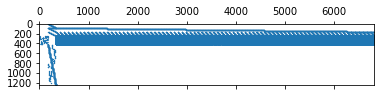

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse

p.postsolve()

# Extract all coefficient data with getrows()
mstart, indices, coeff = [], [], []
p.getrows(mstart, indices, coeff, p.attributes.elems, 0, p.attributes.rows-1)

# mclind contains variable objects, not indices.
# Extract the index for all of them with getIndex()
indices_num = [p.getIndex(v) for v in indices]
A = sparse.csr_matrix((coeff, indices_num, mstart))

# Use the spy() function for plotting the matrix
plt.spy(A, markersize = .2)
plt.show()

### NumPy operators and arrays of variables/constraints

NumPy is an essential toolbox for Python users. The Xpress Python interface can handle (multi-)arrays of floats, variables, expressions, constraints as naturally as with lists thereof.

In [16]:
import numpy as np
import xpress as xp

x = np.array([xp.var() for _ in range(1000)], dtype = xp.npvar)

x = xp.vars(1000)

We can also rewrite the knapsack problem using NumPy constructs.

In [17]:
import xpress as xp
import numpy as np

v = np.array([12,15,9,11,8, 7,5])
w = np.array([13,18,9,12,8,10,4])
C = 40

n = len(v)

# Create numpy array of n binary variables
x = xp.vars(n, vartype = xp.binary)

# Create constraints and objective for the knapsack
k_con = xp.Dot(w, x) <= C
k_obj = xp.Dot(v, x)

# Create (maximization!) problem
p = xp.problem(x, k_con, k_obj, sense = xp.maximize)
p.solve()

print(p.getSolution())


FICO Xpress v8.9.0, Hyper, solve started 20:03:23, Sep 15, 2020
Heap usage: 331KB (peak 331KB, 661KB system)
Detected container-enforced core limit of 1
Detected container-enforced memory limit of 2048 MB
Maximizing MILP noname
Original problem has:
         1 rows            7 cols            7 elements         7 globals
Presolved problem has:
         1 rows            7 cols            7 elements         7 globals
Presolve finished in 0 seconds
Heap usage: 357KB (peak 361KB, 662KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 4.00e+00,  1.80e+01] / [ 2.50e-01,  1.12e+00]
  RHS and bounds [min,max] : [ 1.00e+00,  4.00e+01] / [ 1.00e+00,  2.50e+00]
  Objective      [min,max] : [ 5.00e+00,  1.50e+01] / [ 5.00e+00,  1.50e+01]
Autoscaling applied standard scaling

Will try to keep branch and bound tree memory usage below 1.3GB
 *** Heuristic solution found:      .000000      Time: 0 ***
 *** Heuristic solution found:

**Exercise**: Create a random 20x30 numpy matrix $A$ and vectors ${\bf b}$ and ${\bf c}$, then create a problem with ${\bf c}$ as objective function coefficient vector and constraints $A{\bf x} \le {\bf b}$.

In [12]:
n = 3 # number of variables
m = 2 # number of constraints

# TODO Create numpy random matrix A, b, and c using the function
# np.random.random(), with a single parameter k to create a
# 1-dimensional array and the tuple (k1,k2) for a matrix

# TODO Create a variable vector

# TODO Create objective and constraint using the xpress.Dot() operator.

# TODO Create problem

p.solve()


Starting root cutting & heuristics
 
 Its Type    BestSoln    BestBound   Sols    Add    Del     Gap     GInf   Time
c          -45.584051   -73.403880      3                 37.90%       0      1
r          -51.158698   -73.403880      4                 30.31%       0      2
r          -54.177303   -73.271904      5                 26.06%       0      7
   1  O    -54.177303   -73.271904      5    192    660   26.06%     290      7
   2  O    -54.177303   -73.171500      5    295    237   25.96%     256     11
   3  O    -54.177303   -73.145129      5    392    216   25.93%     249     14
   4  O    -54.177303   -73.115831      5    309    177   25.90%     230     17
   5  O    -54.177303   -73.091348      5    232    222   25.88%     263     20
   6  O    -54.177303   -73.080536      5    160    208   25.87%     270     22
   7  K    -54.177303   -73.070455      5    146    106   25.86%     266     25
   8  K    -54.177303   -73.065953      5    109    116   25.85%     271     28
  

Let's spice it up: make the objective function quadratic, with a matrix $Q$ that is PSD but not necessarily diagonal. Make the objective

$$
(x-x_0)^T Q (x-x_0)
$$

In [13]:
# This matrix is positive semidefinite, so that the problem is convex.
Q = np.random.random((n,n)) - 0.5 + 3*n*np.eye(n)

# Creates a uniformly random point with coordinates in [0,10]
x0 = 10 * np.random.random(n)  

# TODO Alter the objective function so as to minimize weighted
# (with Q) distance between x and x0: (x-x0)' Q (x-x0)

p.solve()


Starting root cutting & heuristics
 
 Its Type    BestSoln    BestBound   Sols    Add    Del     Gap     GInf   Time
 
Starting tree search.
Deterministic mode with up to 1 running thread and up to 1 task.
Heap usage: 105MB (peak 127MB, 1293KB system)
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
       1   -54.177303   -73.027013      5      2      1   25.81%     286      0
       2   -54.177303   -72.954111      5      2      3   25.74%     225      6
       3   -54.177303   -72.950762      5      3      4   25.73%     202     10
       4   -54.177303   -72.950762      5      4      5   25.73%     114     13
       5   -54.177303   -72.833396      5      5      3   25.61%      99     16
       6   -54.177303   -72.833396      5      6      4   25.61%     108     18
       7   -54.177303   -72.833396      5      7      5   25.61%     114     20
       8   -54.177303   -72.638234      5      8      4   25.41%     105     22
       9   -54.177303   -

Obviously we can use arrays of variables in constraints. Let's consider the following problem:

### Production planning with quadratic cost

A factory must plan production on one machine for the upcoming $N=12$ days. If, on one day, the machine is on, it must pay a fixed cost F, regardless of how much is produced on that machine. If the machine is on, the production must range between L and U. It must also pay a cost that is C times the square of the produced amount.

The demand at a given day is $w_i$, and the unsold product can be stored in a storage container of capacity $M$. Finally, the storage level at the end of the $N$ days must be the same as the beginning, which is set as $S$.

**Model**. Define two classes of variables, $x$ (continuous) and $y$ (binary), indicating the amount of production in a given day and whether the machine is on or off, respectively. Also, introduce a storage variable $s$ that is also indexed by the set of periods.

In [14]:
import xpress as xp

n = 12  # number of periods
N = range(n)

# Input parameters

C = 2   # proportional cost
F = 9000  # fixed cost
L = 10   # min. production level
U = 90   # max. production level
M = 170  # maximum storage level
S = 25   # initial storage level

# Demand
w = [60, 15, 25, 70, 70, 85, 10, 5, 65, 40, 50, 15]

# TODO Create variables: y is a binary vector of size n, x has size
# n, while s has size n+1 to include storage at time n + 1

# TODO Total production cost (to be minimized)

# TODO y determines bounds on x: if y=1, then x is
# between L and U, otherwise it is 0. How to do it
# using notions learned during the course? Hint: think
# about big-M.

# TODO Constrain storage at last period

# TODO Production balance:
# the storage at time i plus the production at time i
# must equal
# the storage at time i+1 plus the demand at time i.

# TODO create a problem with the variables, objectives, and constraints
# as defined above.

p.solve()

print('time demand machine productn storage')
for i in N:
    print('{0:4d} {1:6d} {2:7.0f} {3:8.4f} {4:7.4f}'.format(i, w[i],
                                                            p.getSolution(y[i]),
                                                            p.getSolution(x[i]),
                                                            p.getSolution(s[i])))

 
Starting tree search.
Deterministic mode with up to 1 running thread and up to 1 task.
Heap usage: 111MB (peak 127MB, 1293KB system)
Heap usage: 111MB (peak 127MB, 1293KB system)
B&B tree size: 1.0MB total
 
    Node     BestSoln    BestBound   Sols Active  Depth     Gap     GInf   Time
      40   -54.177303   -72.340602      5     35     10   25.11%     103      5
      50   -54.177303   -72.340602      5     40     20   25.11%      81     13
      62   -54.177303   -72.340602      5     52     32   25.11%      88     21
      74   -54.177303   -72.340602      5     52     44   25.11%      42     28
      84   -54.177303   -72.340602      5     52     52   25.11%      30     33
      94   -54.177303   -71.975662      5     79     17   24.73%      94     43
     105   -54.177303   -71.975662      5     87     28   24.73%      95     51
STOPPING - MAXTIME limit reached (MAXTIME=-60  time=61).
 *** Search unfinished ***    Time:    61 Nodes:        122
Final MIP objective              

TypeError: 'xpress.var' object is not subscriptable

**Homework**: Rewrite the problem using NumPy for defining parameters, variables, constraints, and objective.

In [ ]:
import xpress as xp
import numpy as np

# Demand is translated to a NumPy array for using NumPy operators
w = np.array(w)

# TODO Variables: use vars() but remember to name them in order to
# avoid variables with same name. For instance, use x = xp.vars(..., name='prod')
# for production variables

# TODO Total production cost (to be minimized)

# TODO y determines bounds on x (just two numpy inequalities)

# TODO storage at last period (doesn't change from previous model)

# TODO Production balance: use the range operator of arrays for the s[] variable to write a 
# single numpy constraint.

# TODO create problem

p.solve()

print('time demand machine productn storage')
for i in N:
    print('{0:4d} {1:6d} {2:7.0f} {3:8.4f} {4:7.4f}'.format(i, w[i],
                                                            p.getSolution(y[i]),
                                                            p.getSolution(x[i]),
                                                            p.getSolution(s[i])))